# **MÓDULO 18 - Pratique**
# Regressão Linear

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Primeiro modelo**

In [1]:
# Importando as blibliotecas necessárias.

import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # Exibe todas as expressões da célula

In [2]:
# Verificando se o caminho existe

caminho = '.\\ALUGUEL_MOD12.csv'

if os.path.exists(caminho) :
    print("O arquivo foi encontrado! ")
else:
    print("O arquivo não foi encontrado. ")

# Atribuindo ao df

df = pd.read_csv(caminho, delimiter=';')

df.head(10)

O arquivo foi encontrado! 


,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
# Verificando os tipos de dados, para saber se há necessidade de alteração.

df.info()

# Verificando se há valores nulos.

df.isnull().sum() # Após a verificação foi possíel ver que não há valores nulos, logo o tratamento não se faz necessário.

# Por garantia vou vericar se há valores igual a 0 na coluna metragem

qtd_zero = (df['Metragem'] == 0).sum()
print('A quantidade de zeros é: ', qtd_zero) # De fato não há valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_Banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_Banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

A quantidade de zeros é:  0


# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [4]:
# A)

# Verificando a distribuição dos dados

df.describe() # Após a função, algumas viáreis se mostraram suspeitas em relação a ter outliers, indicando que uma análise mais profunda se faz necessária.

# As váriaveis que se mostram mais importantes de analisar são Valor_Aluguel, Metragem, N_Quartos e Valor_Condominio. Logo vou plotar um gráfico para todas elas. 

for col in ["Valor_Aluguel","Metragem", "N_Quartos", "Valor_Condominio"]:
    px.box(df, y=col, points="suspectedoutliers", hover_data={
        "Metragem":":.0f",
        "Valor_Condominio":":.0f",
        "N_Banheiros":True,
        "N_Suites":True,
        "N_Vagas":True,
        "Valor_Aluguel":":.0f"
        }).show()

df.corr()

# Vou fazer uma função para dizer a quantidade dos 95% mais altos, visando facilitar no futuro

def t_quant (x, y):
    the_quant = df[x].quantile(y)
    print("Os", (1 - y),  "mais caros de ", x, " são:", the_quant)

# Númericamente há sim váriaveis que indicam a possibilidade de outliers mas dependendo pode ser uma possibilidade real que não necessariamente precise de tratamento, um exemplo seria, apesar de 5 suíes em uma casa ser muita coisa, pode ser uma possibilidade.

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
Valor_Aluguel,1.000000,0.695302,0.730591,0.413139,0.603715,0.614397,0.652858
Valor_Condominio,0.695302,1.000000,0.805926,0.497420,0.585795,0.589244,0.690993
Metragem,0.730591,0.805926,1.000000,0.678091,0.687558,0.696281,0.743872
N_Quartos,0.413139,0.497420,0.678091,1.000000,0.553807,0.540887,0.591224
N_Banheiros,0.603715,0.585795,0.687558,0.553807,1.000000,0.920149,0.694983
N_Suites,0.614397,0.589244,0.696281,0.540887,0.920149,1.000000,0.712054
N_Vagas,0.652858,0.690993,0.743872,0.591224,0.694983,0.712054,1.000000


In [5]:
# Análise da variável "Valor_Condominio"

# Antes vou salvar o original para efeito de comparação

df["Valor_Condominio_Original"] = df["Valor_Condominio"]

# Agora vou começar a análise

px.box(
    df,
    y="Valor_Condominio",
    title="Boxplot da coluna 'Valor_Condominio'",
    hover_data={
        "Metragem":":.0f",
        "Valor_Condominio":":.0f",
        "N_Banheiros":True,
        "N_Suites":True,
        "N_Vagas":True,
        "Valor_Aluguel":":.0f"
    }

)

# Agora vou ver a porcentagem dos 1% que representavam a maior parte

t_quant("Valor_Condominio", 0.99)

# Uma parte muito pequena representava valores muito altos então decidi dar drop, vito que era uma porcentagem muito pequena, e mante-la poderia causar um viés ao invés de ajudar com uma solução

lim_Condominio = df['Valor_Condominio'] > 4000
print("Vão sair:", lim_Condominio.sum(), f"({lim_Condominio.mean():.2%})")

df = df.loc[df['Valor_Condominio'] <= 4000].copy()

px.box(
    df,
    y="Valor_Condominio",
    title="Boxplot da coluna 'Valor_Condominio'",
    hover_data={
        "Metragem":":.0f",
        "Valor_Condominio":":.0f",
        "N_Banheiros":True,
        "N_Suites":True,
        "N_Vagas":True,
        "Valor_Aluguel":":.0f"
    }

)

# Esse coluna eu decidi dar drop no que fujia muito, apesar de ser uma possibilidade ter um condomínio bem alto, os 1% mudavam muito de valor em comperação com resto, dobrando até, então por ser um caso muito específico, eu preferi dar drop. O gráfico sofreu pequenas alterações mas pela correlação com a coluna principal e com metragem, julguei fazer sentido retirar valores tão altos, e que representam tão pouco do df

Os 0.010000000000000009 mais caros de  Valor_Condominio  são: 4000.0
Vão sair: 72 (1.00%)


In [6]:
# Análise da variável "Metragem"

# Antes vou salvar o original para efeito de comparação

df['Metragem_Original'] = df['Metragem']

# Agora vou começar a análise

px.box(
    df,
    y="Metragem",
    title="Boxplot da coluna 'Metragem'",
    hover_data={
        "Metragem":":.0f",
        "Valor_Condominio":":.0f",
        "N_Banheiros":True,
        "N_Suites":True,
        "N_Vagas":True,
        "Valor_Aluguel":":.0f"
    }

)

# Agora vou ver a porcentagem dos 1% que representavam a maior parte

t_quant('Metragem', 0.99)

# Como no outro caso, vou dar drop nesses 1% mais altos pois eles diferem muito dos outros valores e eles representam uma parte muito pequena em comparação com o todo

lim_Metragem = df['Metragem'] > 280
print("Vão sair:", lim_Metragem.sum(), f"({lim_Metragem.mean():.2%})")

df = df.loc[df['Metragem'] <= 280].copy()

# Agora vou plotar um gráfico para ver como está a distribuição

px.box(
    df,
    y="Metragem",
    title="Boxplot da coluna 'Metragem'",
    hover_data={
        "Metragem":":.0f",
        "Valor_Condominio":":.0f",
        "N_Banheiros":True,
        "N_Suites":True,
        "N_Vagas":True,
        "Valor_Aluguel":":.0f"
    }

)

# Como no caso anterior, uma porcentagem muito pequena foi retirada, cerca de 1%, logo não deve representar grandes problemas, é um dado muito sensível, como os outros são, e de dfícil alteração, logo, para evitar vies fez mais sentido retirar os dados do que altera-los, princilpamente por que foi só 1% e esse 1% tinha uma diferença muito grande de valor em comparação com o resto.

Os 0.010000000000000009 mais caros de  Metragem  são: 280.0
Vão sair: 67 (0.94%)


In [7]:
# Análise N_Quartos

# Vou começar a análise

px.box(
    df,
    y="N_Quartos",
    title="Boxplot da coluna 'N_Quartos'",
    hover_data={
        "Metragem":":.0f",
        "Valor_Condominio":":.0f",
        "N_Banheiros":True,
        "N_Suites":True,
        "N_Vagas":True,
        "Valor_Aluguel":":.0f"
    }

)

# Agora vou ver a porcentagem dos 1% que representavam a maior parte

t_quant('N_Quartos', 0.99)

# Como no outro caso, vou dar drop nesses 1% mais altos pois eles diferem muito dos outros valores e eles representam uma parte muito pequena em comparação com o todo

lim_N_Quartos = df['N_Quartos'] > 8
print("Vão sair:", lim_N_Quartos.sum(), f"({lim_N_Quartos.mean():.2%})")

df = df.loc[df['N_Quartos'] <= 8].copy()

# Gráfico para verificar a diferença

px.box(
    df,
    y="N_Quartos",
    title="Boxplot da coluna 'N_Quartos'",
    hover_data={
        "Metragem":":.0f",
        "Valor_Condominio":":.0f",
        "N_Banheiros":True,
        "N_Suites":True,
        "N_Vagas":True,
        "Valor_Aluguel":":.0f"
    }

)


# Decidi retirar pois aprentou muito que a presença do outlier foi um erro de digitição, escolhi o drop por ser uma quantidade pequena de dados

Os 0.010000000000000009 mais caros de  N_Quartos  são: 4.0
Vão sair: 1 (0.01%)


33.59608138146756


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Valor_Aluguel', ylabel='Count'>

Text(0.5, 1.0, 'Histograma da Valor Aluguel')

Text(0.5, 0, 'Valor Aluguel')

Text(0, 0.5, 'Contagem')

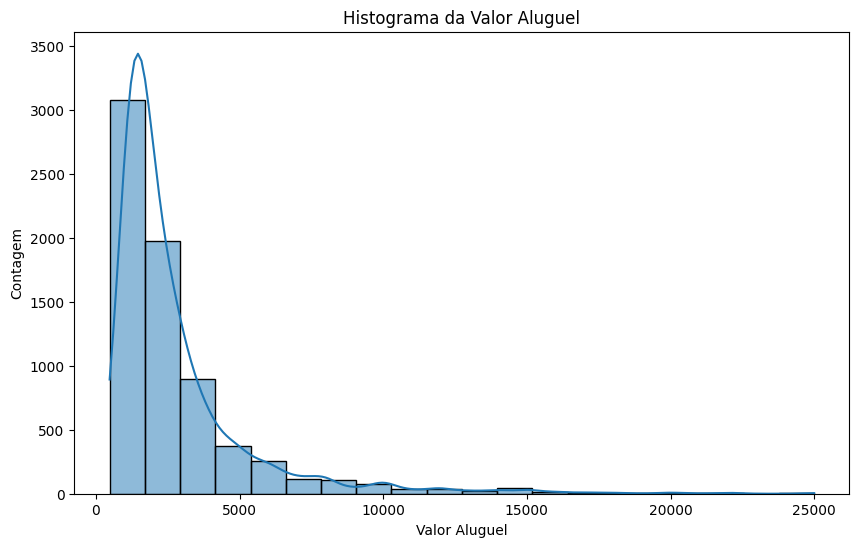

,N_Vagas,Valor_Aluguel
0,0,1400.0
1,1,1600.0
2,2,3000.0
3,3,5300.0
4,4,8500.0
5,5,13000.0
6,7,25000.0
7,9,25000.0


Os 0.050000000000000044 mais caros de  preco_m2  são: 72.22222222222223
Os 0.010000000000000009 mais caros de  Valor_Aluguel  são: 14380.00000000011


Linhas que serão ajustadas: 232 (3.28%)


Os 0.010000000000000009 mais caros de  Valor_Aluguel  são: 12969.000000000005


,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas,Valor_Condominio_Original,Metragem_Original,Valor_Aluguel_Original
Valor_Aluguel,1.000000,0.695898,0.759715,0.409851,0.616400,0.616589,0.648744,0.695898,0.759715,0.972965
Valor_Condominio,0.695898,1.000000,0.777861,0.476022,0.564503,0.547541,0.665229,1.000000,0.777861,0.666584
Metragem,0.759715,0.777861,1.000000,0.688915,0.687331,0.675485,0.725749,0.777861,1.000000,0.709938
N_Quartos,0.409851,0.476022,0.688915,1.000000,0.517477,0.503236,0.557967,0.476022,0.688915,0.365886
N_Banheiros,0.616400,0.564503,0.687331,0.517477,1.000000,0.915286,0.667637,0.564503,0.687331,0.583587
N_Suites,0.616589,0.547541,0.675485,0.503236,0.915286,1.000000,0.679476,0.547541,0.675485,0.585099
N_Vagas,0.648744,0.665229,0.725749,0.557967,0.667637,0.679476,1.000000,0.665229,0.725749,0.618025
Valor_Condominio_Original,0.695898,1.000000,0.777861,0.476022,0.564503,0.547541,0.665229,1.000000,0.777861,0.666584
Metragem_Original,0.759715,0.777861,1.000000,0.688915,0.687331,0.675485,0.725749,0.777861,1.000000,0.709938
Valor_Aluguel_Original,0.972965,0.666584,0.709938,0.365886,0.583587,0.585099,0.618025,0.666584,0.709938,1.000000


In [8]:
# Análise da variável "Valor_Aluguel"

# Antes vou salvar o original para efeito de comparação

df["Valor_Aluguel_Original"] = df["Valor_Aluguel"]

# Primeiro verifiquei a média de preço por m2

preco_m2 = (df['Valor_Aluguel'].mean()) / (df['Metragem'].mean())
print(preco_m2)

# Agora vou cria uma coluna para verificar a distribuição de preço do m2

df["preco_m2"] = df["Valor_Aluguel"] / df["Metragem"]

fig = px.histogram(df, 
                   x='preco_m2',
                   histfunc='count',
                   title='Distibuição de preço do m2'
)
fig.show()

# Plotando um histograma para analisarmos a distribuição dos dados

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Valor_Aluguel', bins=20, kde=True)
plt.title('Histograma da Valor Aluguel')
plt.xlabel('Valor Aluguel')
plt.ylabel('Contagem')
plt.show()

df.groupby('N_Vagas')['Valor_Aluguel'].median().reset_index() # Eu pensei em usar o N_vagas para auxiliar, mas todas as variáveis estão diretamente associadas com metragem. Logo vou me basear nela para fazer as auterações

# A decisão de tratamento desses dados é bem díficil visto que não há informações suficentes. Digo, a localização, por exemplo, é um fator que alteraria bastante o valor de aluguel de um imóvel, ou seja, imóveis muito caros poderiam ser legítimos dependendo de sua localização, também seria possível um imóvel premium com vista ou com customizações únicas que explicariam seu valor elevado, mas não temos essas informações, então é importante tratar esses dados desconsiderando as possibilidades adversas da vida real (Exemplos seriam, classificação de consumo de energia, se é velha ou não, se foi bem estruturada, tipo de vizinhança, se tem algum objetivo social , entre outros fatores...), e levando em conta apenas, o que está informado no CSV, e após a análise, a forma mais justa de tratar esses dados seria se baseando no preço do metro quadrado, fazer aumentos justos levando em consideração número de quartos, suítes, banheiros e vagas, mas princilpamente pensando na metragem. Logo, vale pensar que todos os imóveis se encontram na mesma região e possuem características semelhantes, mudando, apenas, as características que foram mencionadas no csv.

# Vou calcular o quantile dos 95% mais alto do preço do m2

t_quant('preco_m2', 0.95) # Pensei em apagar mas ainda não resolveria os outliers, então vou substituiur pela media
t_quant('Valor_Aluguel', 0.99)

px.box(
    df,
    y='preco_m2',
    title="Boxplot do preço por metro quadrado",
    hover_data={
        "Metragem":":.0f",
        "Valor_Condominio":":.0f",
        "N_Banheiros":True,
        "N_Suites":True,
        "N_Vagas":True,
        "Valor_Aluguel":":.0f"}
).show()

# Mesmo pensando pensando só nos dados do CSV, as substituições poderiam fugir muito da realidade, logo, cojitei em substituir os casos extremos pela média (Tendo em mente que não tenho muitas informações e podem exister casos premiuns)

# Aqui vou escolher os limites me baseando no iqr, não quero causar viés e muitos dos casos são possíveis, então vou ajustar casos que teoricamente seriam improvaveis e que aparentam estar distocidos

lim_aluguel = 5900.0    # upper fence do Valor_Aluguel (Q3 + 1.5*IQR)
lim_m2   = 63.0      # upper fence do preco_m2 (Q3 + 1.5*IQR)

# Aqui tem o ajuste e para o dado ser alternado ele precisa satisfazer essas duas condições

ajuste_aluguel = (
    (df["preco_m2"] > lim_m2) &
    (df["Valor_Aluguel"] > lim_aluguel)
)

print(f"Linhas que serão ajustadas: {ajuste_aluguel.sum()} ({ajuste_aluguel.mean():.2%})") # Verificando a porcentagem de dados que serão alterados

# Apenas, 3,5% dos dados terão uma alteração, dados estes que se encontram e condições extremas e fará sentido altera-los.

# Agora farei o ajuste dos valores que precisam ser ajustados

df.loc[ajuste_aluguel, "Valor_Aluguel"] = df.loc[ajuste_aluguel, "Metragem"] * lim_m2

# Aqui terá um boxplot para verificar como a coluna está se comportando agora

px.box(df, y="Valor_Aluguel", points="suspectedoutliers", hover_data={
        "Metragem":":.0f",
        "Valor_Condominio":":.0f",
        "N_Banheiros":True,
        "N_Suites":True,
        "N_Vagas":True,
        "Valor_Aluguel":":.0f",
        "preco_m2":":.0f"
        }).show() 

t_quant('Valor_Aluguel', 0.99) #Verificando o 1% para comparação 

# Vou retirar a coluna de m2 vsito que ela se encontra desatualizada, e ela cumpriru seu objetivo de auxiliar nos ajustes dos dados de Valor_Aluguel

df = df.drop(['preco_m2'], axis=1)

# Agora vou utilizar o método corr para saber como a coluna esta se comportando em relação as outras.

df.corr() # Após a análise ela se mostrou estar mais correlacionada em comporação com a coluna principal

# Minhas alterações nessa coluna acabam aqui, visto que ela é a coluna alvo e qualquer alteração nela teve que ser bem direcionada e decidida, a remoção ou tratamento dos outliers consite em tratar possíveis erros visando evitar viés no modelo, mas vale ressaltar que quando o assunto é propriedade, muitos valores fazem sentido e não necessariamente indicam erro, escolher seguir apenas o csv, e se basear apenas em um fator é arriscado, pois dados verdadeiros poderiam ser apagados, por isso o foco principal foi retirar apenas casos extremos, mas seguindo a realidade e o CSV em conjunto. Um exemplo seria pensar que um aluguel de um imovel com vista pro mar, pode facilmente dobrar de valor comparado ao mesmo apartamento, no mesmo prédio mas com vista contrária ao mar. Por isso o tratamento se consentrou em lidar com valores que era extremamente alarmantes e apontavam sim, uma grande chance de erro. 

# Análise pós tratamento

**Explicação:**

No geral, todas essas são varíaveis que eram possíveis (Pensando que são imóveis e podem sim ter uma grande variação de preço dependendo de diversos fatores que pelo CSV não conseguimos saber, mesmo estando na mesma região ou até mesmo prédio), e o tratamento foi bem pontual, e visava principalmente melhorar o modelo, ou seja, mesmo que fosse possível um codomínio que custa 10000 e um aluguel que custasse 6000 (Nesse exemplo a pessoa poderia morar no em um prédio extremamente caro, mas em uma apartamento de 1 quarto), é um caso extremamente específico e raro e que não será de ajuda para o modelo e teria mais chance de confundir ou gerar um viés do que qualquer outra coisa. Logo, o tratamento foi concentrado em retirar casos extremos para aprimorar a capacidade preditiva do modelo e principalmente, sua precisão.

Valor_Condomínio - Essa foi a primeira que escolhi realizar a análise, por que com base nas váriaveis que poderiam ter outliers, ela tinha a menor correlação com a análise alvo. Eu decidi dar drop no 1% que representava mais, visto que a quantidade era muito pequena mas o valor era muito grande, 4000 para ser mais específico, logo fez sentido dar drop pensando que a chance de um valor tão alto seria muito improvável, mesmo que possível, e tem mais chance de confundir o modelo do que melhorar sua precisão. 

Metragem - Fiz a mesma coisa que Valor_Condomínio mas confesso ter ficado recioso em dar drop pois talvez manter os valor fosse mais benéfico, mas novamente, por representar um porcentagem muito baixa, 1%, considerei que faria sentido para aumenta a eficácia do modelo.

N_Quartos - Resolvi dar drop, pois era apenas um valor e se mostrou ter uma fonte têndecia em ser um outlier causado por erro de digitação

Valor de aluguel - Essa era a variável alvo, então optei por não apagar dados, e preferi fazer uma substituição, que entressa dentro de condições específicas, visto que nesse momento já era claro que o valor podia variar muitor e por ser a variável alvo, as alterações tinha que ser meticulosas, logo, optei por fazer a coluna preco_m2 (Para faze-la dividi o Valor_Aluguel pela Metragem) após fiz o bloxplot do preço por metro quadrado para entender como essas variáveis se comunicavam por ter um corr alta, e usei ela como auxílio para fazer as alterações. Funcionou da seguinte forma, se o valor do m2 e o valor do aluguel ultrapassassem o valor dos quadrantes superiores dessas variáveis (Ou seja, com isso eu já inclui os casos de propriedades que podem trazer benefícios específicos possíveis, que ja foram mencionados, um exemplo seria vista pro mar) seria multiplicado a metragem vezes o quadrante superior de m2 para achar um Valor_Aluguel mais apropriado para o modelo. Eu fiz isso visando impedir casos onde um aluguel era alto demais com relação as outras váriaveis do CSV mas sem excluir os casos de propriedades existentes mas que são "Premium", Cerca de apenas 3,5% dos dados foram alterados, logo, o tratamento não gerou um grande viés, e serviu mais para alterar dados erronêos mesmo sem perder dados valiosos.

In [9]:
# Primeiro o describe para ver como elas estão se comportando unitariamente

df.describe()

# E agora a correlação para ver como elas se comportam em relação ao todo

df.corr()

# Vou dropar as colunas que não fazem sentido manter por causa do método que escolhi para trata-las

df = df.drop(['Valor_Condominio_Original'], axis=1)
df = df.drop(['Metragem_Original'], axis=1)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas,Valor_Condominio_Original,Metragem_Original,Valor_Aluguel_Original
count,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000
mean,2711.033130,751.040776,83.375478,2.268724,2.051395,0.973949,1.395441,751.040776,83.375478,2801.089339
std,2289.353435,632.216791,47.884189,0.794341,0.922695,0.812777,0.789923,632.216791,47.884189,2602.167174
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,30.000000,480.000000
25%,1347.000000,390.000000,51.000000,2.000000,2.000000,1.000000,1.000000,390.000000,51.000000,1347.000000
50%,1900.000000,585.000000,66.000000,2.000000,2.000000,1.000000,1.000000,585.000000,66.000000,1900.000000
75%,3000.000000,942.000000,96.000000,3.000000,2.000000,1.000000,2.000000,942.000000,96.000000,3100.000000
max,17640.000000,4000.000000,280.000000,5.000000,7.000000,4.000000,9.000000,4000.000000,280.000000,25000.000000


,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas,Valor_Condominio_Original,Metragem_Original,Valor_Aluguel_Original
Valor_Aluguel,1.000000,0.695898,0.759715,0.409851,0.616400,0.616589,0.648744,0.695898,0.759715,0.972965
Valor_Condominio,0.695898,1.000000,0.777861,0.476022,0.564503,0.547541,0.665229,1.000000,0.777861,0.666584
Metragem,0.759715,0.777861,1.000000,0.688915,0.687331,0.675485,0.725749,0.777861,1.000000,0.709938
N_Quartos,0.409851,0.476022,0.688915,1.000000,0.517477,0.503236,0.557967,0.476022,0.688915,0.365886
N_Banheiros,0.616400,0.564503,0.687331,0.517477,1.000000,0.915286,0.667637,0.564503,0.687331,0.583587
N_Suites,0.616589,0.547541,0.675485,0.503236,0.915286,1.000000,0.679476,0.547541,0.675485,0.585099
N_Vagas,0.648744,0.665229,0.725749,0.557967,0.667637,0.679476,1.000000,0.665229,0.725749,0.618025
Valor_Condominio_Original,0.695898,1.000000,0.777861,0.476022,0.564503,0.547541,0.665229,1.000000,0.777861,0.666584
Metragem_Original,0.759715,0.777861,1.000000,0.688915,0.687331,0.675485,0.725749,0.777861,1.000000,0.709938
Valor_Aluguel_Original,0.972965,0.666584,0.709938,0.365886,0.583587,0.585099,0.618025,0.666584,0.709938,1.000000


# Análise Bivariada

Variáveis analisadas:

*Valor do Aluguel x Metragem*

*Valor do Condomínio x Valor do Aluguel* 

*Metragem x Valor do Condomínio*

Extra: 

*Valor do Aluguel x Espaco_Util*

In [10]:
# Preparação

df['Espaco_Util'] = (
    df['N_Quartos'] +
    df['N_Banheiros'] +
    (df['N_Suites'] * 2) +
    df['N_Vagas']
)

df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas,Valor_Aluguel_Original,Espaco_Util
count,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000
mean,2711.033130,751.040776,83.375478,2.268724,2.051395,0.973949,1.395441,2801.089339,7.663457
std,2289.353435,632.216791,47.884189,0.794341,0.922695,0.812777,0.789923,2602.167174,3.601524
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,480.000000,2.000000
25%,1347.000000,390.000000,51.000000,2.000000,2.000000,1.000000,1.000000,1347.000000,6.000000
50%,1900.000000,585.000000,66.000000,2.000000,2.000000,1.000000,1.000000,1900.000000,7.000000
75%,3000.000000,942.000000,96.000000,3.000000,2.000000,1.000000,2.000000,3100.000000,9.000000
max,17640.000000,4000.000000,280.000000,5.000000,7.000000,4.000000,9.000000,25000.000000,26.000000


**Valor do Aluguel x Metragem**

Insight: Com o gráfico podemos perceber que quanto maior é o apartamento, mais chance dele custar bastante (Extremidade da direita) e quanto menor maior a chance dele ser barato(Extremidade da esquerda), Também é possível verificar isso por causa da linha de tendência que tende a crecer a medida que vai para direita. Isso acontece por causa da oferta de propriedades de acordo com a renda, ou seja, disponilibilidade, logo, lugares menores tendem a custar menos e lugares maiores tendem a custar mais. Também é possível ver que existe uma quantidade muito maior de lugares menores do que de lugares maiores, ou seja, existem muitos apartamentos que possuem em torno de 50 m2 mas poucos que possuem 250 m2. E isso faz sentido já que a disponibilidade de lugares menores é bem maior do que a de lugares menores. Aprovitando o gráfico, aproveitei para colocar color no número de vagas, e mostrou novamente, que lugares menores tem uma tendencia a não ter vagas, o que faz sentido também, pelo mesmo motivo que os outros.

In [11]:
fig = px.scatter(
    df,
    x="Metragem",
    y="Valor_Aluguel",                
    trendline="ols",                  # linha de tendência
    opacity=0.6,
    color="N_Vagas",                  # Adicionar informações sem poluir    
    hover_data={                      # Adicionar informações ao passar o mouse
        "Metragem":":.0f",
        "Valor_Aluguel":":,.0f",
        "N_Quartos":True,
        "N_Banheiros":True,
        "N_Suites":True,
        "N_Vagas":True
    },
    title="Valor do aluguel vs. metragem"
)
fig.update_traces(marker=dict(size=6, line=dict(width=0)))

**Valor do Condomínio x Valor do Aluguel** 

Insight: Esse gráfico mostra que independento do valor há propriedades que não tem condomínio, e isso faz sentido, esses propriedades poderiam ser casas por exemplo, que podem custar valores diversos, e não teriam que ter valores de condomínio, mas desconsiderando essas, conseguimos observar que o condomínio tende a crescer junto com o valor do aluguel, ou seja imóveis com valores de aluguel mais alto tendem a ter valores de condomínio mais altos e imóveis com alugueis mais baixos tendem ter concomínios mais baixos também, quando olhamos para o valor máximo do aluguel de acordo com o condomínio, isso talvez não seja tão evidente, mas ao olhar para o valor mínimo, se torna bem mais evidente(Extremidade da direita), já que para condomínios que custam 3 mil não há valores de aluguel menores que 2 mil por exemplo, isso provavelmente acontece pois as duas váriaveis andam juntas e a tendência é se você mora em um prédio bom, mesmo que seu apartamento seja pequeno, você tem a tendencia de pagar mais no seu aluguel quando comparado com um apartamento de mesmo tamanho mas em um prédio mais básico.

In [12]:
fig = px.scatter(
    df,
    x="Valor_Condominio",
    y="Valor_Aluguel",                
    trendline="ols",                  
    opacity=0.6,              
    hover_data={                      
        "Metragem":":.0f",
        "Valor_Aluguel":":,.0f",
        "N_Quartos":True,
        "N_Banheiros":True,
        "N_Suites":True,
        "N_Vagas":True
    },
    title="Valor do Condominio vs Valor do Aluguel"
)
fig.update_traces(marker=dict(size=6, line=dict(width=0)))

**Metragem x Valor do Condomínio**

Insight: Novamente, há muitos imóveis que não tem que pagar condomínio, fortelecendo ainda mais a ideia de casas ou propriedades desse tipo, que independente do tamanho o condomínio se mantem 0. Por outro lado, tirando as propriedades que não tem condomínio, esse gráfico mostra que quanto maior o ímovel, mais caro é o condomínio, o que também é coeso, visto que um lugar maior, ocupa mais espaço, no contexo de um prédio, se torna justo ter um contodomínio mais caro, ainda mais que o gráfico também mostra que quanto maior os imóveis, maiores tendencias a ter mais quartos (Fortalecendo talvez que dentro do dataframa, a quantidade de imóveis residencias é maior do que a quantidade de imóveis comerciais por exemplo), logo, teoricamente mais pessoas usariam os benefícios do prédio, explicando o valor de condomínio mais alto. O mesmo vale para o inverso, lugares menores, com menos quartos, evidentemente possuem um valor de condomínio mais baixo, provavelmente por causa da mesma lógica. Nesse gráfico também fica evidente que a relação de quartos é diretamente com metragem e não com condomínio, porque mesmo quando condomínio é 0 (Caso de casas) há imóveis com muitos quartos, mas como condomínio, fora desse caso, se relaciona diratamente com metragem, visualmente, todas as variaveis "andam" juntas, visto que um apartamento maior, provavelmente possue mais quartos e provalmente vai pagar um valor maior de condomínio.

In [13]:
fig = px.scatter(
    df,
    x="Valor_Condominio",
    y="Metragem",                
    trendline="ols",                  
    opacity=0.6,
    color='N_Quartos',              
    hover_data={                      
        "Metragem":":.0f",
        "Valor_Aluguel":":,.0f",
        "N_Quartos":True,
        "N_Banheiros":True,
        "N_Suites":True,
        "N_Vagas":True
    },
    title="Metragem vs Valor do Aluguel"
)
fig.update_traces(marker=dict(size=6, line=dict(width=0)))

**Valor do Aluguel x Espaço Útil**

Insight: Esse gráfico mostra que a tendência é que mais Espaços úteis na propriedade, maior é chance da propriedades custar mais, o leque de possibilidades vai abrindo a medida que o valor de aluguel aumenta, já com o alugueis mais baratos as opções são menores, no sentido de que a quantidade de espaços úteis é mais baixa. E isso faz sentido, já que é possível com um orçamento alto, escolher morar em um lugar grande, com muitos espaços úteis, ou menor, já com um orçamento mais reduzido as opções se limitam bem mais a lugares com menos espaços úteis. 

In [14]:
fig = px.scatter(
    df,
    x="Espaco_Util",
    y="Valor_Aluguel",                
    trendline="ols",                  
    opacity=0.6,                     
    hover_data={                      
        "Metragem":":.0f",
        "Valor_Aluguel":":,.0f",
        "N_Quartos":True,
        "N_Banheiros":True,
        "N_Suites":True,
        "N_Vagas":True
    },
    title="Valor do aluguel vs. Espaço Útil"
)
fig.update_traces(marker=dict(size=6, line=dict(width=0)))

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Matriz de Correlação')

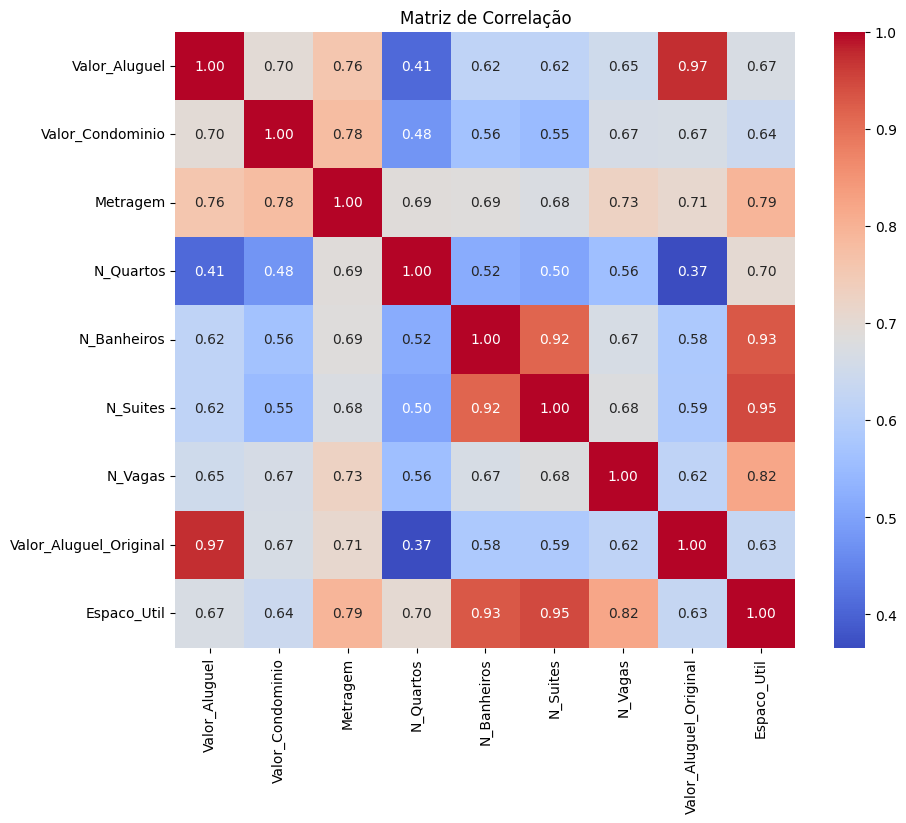

In [15]:
# Escolhi fazer o gráfico para facilitar a visualização

matriz_corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

# Varialvel Alvo - Valor_Aluguel
# As variáveis que mais se correlacionam são, valor condomínio e metragem, a categoria criada para o exercício anterior também aponta um forte correlação, toda via, o objetivo inicial dela era ver visualmente a relação de todos os espaços úteis em relação as ostras váriaveis, era algo mais voltado para facilitar visualização gráfica do data frame, logo, mesmo tendo uma alta correlação, é bem posspivel que ela entro no modelo, visto que ela é uma junção de outras 4 colunas, e possívelmente, utilizar as colunas separadamente seja mais benéfico para a precisão do modelo.  
# OBS: Outra várialvel que se correlaciona demais com o a várialvel alvo é Valor_Aluguel_Original, mas isso acontece pois é a várialvel alvo antes do tratamento, e ela só está no df para efeito de comparação e não deve ser considerada.

In [16]:
# Vou retirar as colunas que foram criadas para facilitar a análise

df = df.drop(['Valor_Aluguel_Original'], axis=1)
df = df.drop(['Espaco_Util'], axis=1)


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [17]:
X = df.drop('Valor_Aluguel', axis=1) # Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] # Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [18]:
# Separando em train e test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48)

# Verificando se o shape ficou correto

def Tamanho (x, y):
    print(x, ':', y.shape)

Tamanho('X_train', X_train)
Tamanho('X_test', X_test)
Tamanho('y_train', y_train)
Tamanho('y_test', y_test)

X_train : (5297, 6)
X_test : (1766, 6)
y_train : (5297,)
y_test : (1766,)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [19]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)

In [20]:
# Agora vou criar e aplicar o modelo

Regre_Metragem = LinearRegression() # Criação

Regre_Metragem.fit(X, y) # Usando .fit para ele aprender

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [21]:
# Vou fazer as verificações

Regre_Metragem.intercept_

Regre_Metragem.coef_

# A equação da reta seria:

'''
f(x) = 36.23 . x + (-321.92)
ou
Aluguel_Alvo = 36.23 . Metragem + (-321.92)
'''

np.float64(-321.9219912060166)

array([36.23014616])

'\nf(x) = 36.23 . x + (-321.92)\nou\nAluguel_Alvo = 36.23 . Metragem + (-321.92)\n'

Nossa equação seria:  

f(x) = 36.23 . x + (-321.92)
ou
Aluguel_Alvo = 36.23 . Metragem + (-321.92)

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

Resposta: Não aparenta ser muito bom não, acabou que o R2 foi em torno de 0.57, o que de certa forma diz que ela tem quase 50% de chance de acertar e 50% de errar, é claro que tem muitos dados, e os dados são muitos dispersos, seria impossível colocar uma reta que cobrisse todos os pontos mas o resultado de fato não é muito gratificante, esse modelo obvieamente só teve uma variavel independente que foi a metragem, que é a váriavel com maior correlação, mas talvez esse valor relativamente baixo não seja um desastre total pois existem muitas váriaveis para defenir o valor de um imóvel e contar com apenas uma pode não ser o suficiente, e esse, provevelmente é o motivo de um R2 tão baixo, vou fazer o mesmo teste mas sem fazer o tratamento com os valores de metragem e Valor do aluguel, apenas para deixar registrado se o tratamento feito foi benéfico ou não. Fiz o R2 quadrado mas sem o tratamento, e o resultado foi ainda pior, mas não muito pior, ele foi para 52%.

Com o tratamento dos dados - R2 = 0.57

Sem o tratamento dos dados - R2 = 0.52

Logo, o tratamento se mostrou benéfico, mas o R2 ainda não se mostrou o ideal, isso provavelmente porque, como foi dito anteriormente, prever algo que depende de muitas váriaveis, com apenas uma, pode trazer problemas na precisão do modelo. Concluindo, com apenas uma variável independente, o modelo não se demosntra muito capaz para relizar previsões, e tem sim uma chance de erro relativamente alta.

In [22]:
Regre_Metragem.score(X, y)

0.5718345416180235

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

Resposta: Pelo gráfico podemos ver que há uma grande quantidade de pontos e a linha não cobre todos eles, principalmente, por estarem bem dispersos, mas há tambem, uma grande quantidade de pontos que a linha passa por eles, isso nos faz pensar que o modelo tem uma certa acurácia mas precisa melhorar, novamente, isso se faz pois calcular a variável alvo que precisa da várias outras váriaveis para defini-las, váriaveis estas que estão dentro e fora do csv, é bem díficil, principalmente pela grande quantidade de dados.

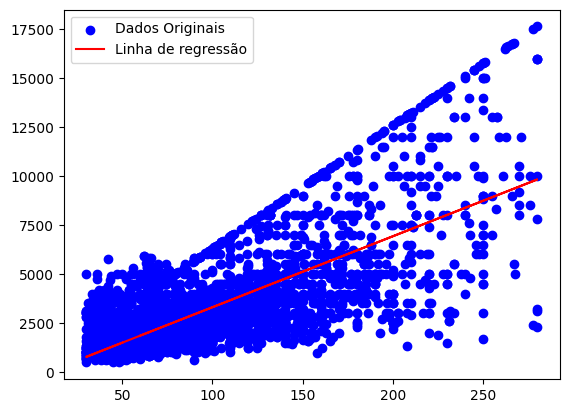

In [23]:
# Agora vou plotar um gráfica para verificar como ele está se saindo

plt.scatter(X, y, color='blue', label='Dados Originais') # Dados originais

plt.plot(X, Regre_Metragem.predict(X), color='red', label='Linha de regressão')
plt.legend()
plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [24]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [25]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = Regre_Metragem.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = Regre_Metragem.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5926349140496638


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

O R2 de teste foi um pouco superior comparando com o R2 de treino (0.57), mas foi bem pouco, já que o R2 dele foi 0.59, não diria que é uma diferença alarmente, é bem pequena na verdade, logo, não consideraria que o modelo está superajustado. O resultado final é mediano, com um r2 em torno de 0.6, mas levando em consideração que foi utilizado apenas uma variável, por ser uma regressão linear simples, e que a variável Valor_Aluguel pode mudar muito dependendo de várias outras coisas, o modelo se saiu bem, mesmo com a precisão relativamente baixa, com as informações que ele tinha, ele conseguiu prever bem. É claro que a possibilidade dele melhorar é bem grande quando ele tiver outras informações, principalmente porque ele esse modelo mostrou que o tratamento de dados foi eficáz e ajudou o modelo a melhorar sua precisão na hora da predição.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [26]:
# Definindo x e y

X = df.drop('Valor_Aluguel', axis=1) # Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] # Separando Y (Apenas variavel valor_aluguel)

# Separando em train e test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48)

# Verificando se o shape ficou correto

Tamanho('X_train', X_train)
Tamanho('X_test', X_test)
Tamanho('y_train', y_train)
Tamanho('y_test', y_test)

# Atibuidondo variáveis

X = X_train[["Metragem", "Valor_Condominio", "N_Quartos", "N_Banheiros", "N_Suites", "N_Vagas"]]
y = y_train

X_train : (5297, 6)
X_test : (1766, 6)
y_train : (5297,)
y_test : (1766,)


B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [27]:
# Criando modelo

Regre_all = LinearRegression()
Regre_all.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


C) Traga o valor do R quadrado e avalie o valor encontrado.

In [ ]:
Regre_all.score(X, y)

# O valor encontrado foi 0.65, no treino foi um r2 mediano para bom, mostra que os dados estãop coesos e que o modelo consegui interpratar bem muitas daz informações dadas, e conseguiu compreender qual direção elas seguem, existem váriaveis importantes para definir o preço do aluguel, mas não estão no csv, limitando um pouco o poer preditivo, mas de qualquer forma foi um resultado bom, e que por sua vez, assegura a coesão das informações, e que em casos de usos reais pode ajudar bastante, não para dar um valor exato, mas sim para ter uma margem de preço bom com base nas características do imóvel.

0.6502222786300844

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [29]:
X_test = X_test[["Metragem", "Valor_Condominio", "N_Quartos", "N_Banheiros", "N_Suites", "N_Vagas"]]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

previsoes = Regre_all.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = Regre_all.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.6524111839457175


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Sobre o modelo com multivariaveis, o valor encontrado foi 0.65, tanto no treino quanto no teste, mostrando que o modelo não está nem superajustado nem subasjustado. O resultado foi melhor do que quando foi feito regressão linear simples, mostrandos que as outras variáveis foram sim importantes para melhorar a precisão do modelo, e com esse r2, ele com certeza fara predições melhores. Vale ressaltar que o r2 não teve uma diferença de valor muito grande, mas teve uma diferença positiva. E é claro, talvez com mais informações, o modelo consiga ficar ainda melhor. Consluindo nesse caso, utilizar as outras variáveis para realizar a predição foi muito positivo, e mostra o potencial do modelo, é claro que o uso no dia a dia seria arriscado usar exatamente o valor que o modelo diz, mas como auxílio para ter uma idéia de valor, o modelo pode sim ser muito útil.

Logo, o modelo de regrssão linear múltipla me parece melhor. A prova disso teoricamente seria o R2 superior, mas eu acredito que ele seja melhor por conseguir decidir melhor o a váriavel alvo, que por sua vez, precisa de muitas váriaveis para ser decidida. Por tanto, o modelo de com multivariaveis consegue entender melhor o impacto que cada váriavel tem na alvo, e por isso ele acaba sendo o melhor